In [19]:
### create school name matching dictionary

import pandas as pd
import numpy as np
import fuzzywuzzy
from fuzzywuzzy import process
import re # RegEx for string matching

In [20]:
wiki_df = pd.read_csv('../data/cfb_d1_teams_with_coordinates.csv')
yearly_df = pd.read_csv('../data/cfb_yearly_summary_stats.csv')

# lowercase column names for easier manipulation
wiki_df.columns = wiki_df.columns.str.lower()
yearly_df.columns = yearly_df.columns.str.lower()

In [21]:
# yearly_df.columns
wiki_df.columns


Index(['team', 'nickname', 'city', 'state', 'enrollment', 'currentconference',
       'formerconferences', 'firstplayed', 'joinedfbs', 'latitude',
       'longitude'],
      dtype='object')

In [22]:

# make adjustments to names from wiki_df to match yearly_df


# create dictionary of name changes
name_changes = {'BYU':'Brigham Young', 'FIU':'Florida International', 'LSU':'Louisiana State', 
                'Middle Tennessee':'Middle Tennessee State', 'NC State':'North Carolina State',
                'Ole Miss':'Mississippi', 'Oregon[n 14]':'Oregon', 'SMU':'Southern Methodist', 
                'Southern Miss':'Southern Mississippi', 'TCU':'Texas Christian', 'UAB':'Alabama-Birmingham', 
                'UCF':'Central Florida', 'UConn':'Connecticut', 'UMass':'Massachusetts', 
                'UNLV':'Nevada-Las Vegas', 'USC':'Southern California', 'UTEP':'Texas-El Paso', 
                'UTSA':'Texas-San Antonio'}

# apply name changes to wiki_df
wiki_df['team'] = wiki_df['team'].replace(name_changes)

# save the new wiki_df to a csv
wiki_df.to_csv('../data/cfb_d1_teams_with_coordinates.csv', index=False)


In [23]:
## Create a dictionary of school names from wikipedia and yearly_df

# Create a list of school names from wikipedia
wiki_schools = wiki_df['team'].tolist()

# Create a list of school names from yearly_df
yearly_schools = yearly_df['team'].tolist()
# keep only unique school names
yearly_schools = list(set(yearly_schools))



In [24]:
len(wiki_schools)
len(yearly_schools)

1350

In [25]:
# try to match the school names from wiki_schools to yearly_schools

# create a dictionary of school names from wiki_schools and yearly_schools
school_dict = {}

# loop through wiki_schools and try to match to yearly_schools
for school in wiki_schools:
    # try to match the school name to yearly_schools
    match = process.extractOne(school, yearly_schools)
    # add the school name and match to the dictionary
    school_dict[school] = match

    
                           

# create a dataframe from the dictionary
school_dict_df = pd.DataFrame.from_dict(school_dict, orient='index')
school_dict_df.columns = ['yearly_name', 'score']
# create new column with school name from wiki_schools
school_dict_df['wiki_name'] = school_dict_df.index
# reset the index
school_dict_df.reset_index(drop=True, inplace=True)

# view the dataframe
school_dict_df.head()



,yearly_name,score,wiki_name
0,Air Force,100,Air Force
1,Akron,100,Akron
2,Alabama,100,Alabama
3,Appalachian State,100,Appalachian State
4,Arizona,100,Arizona


<AxesSubplot:>

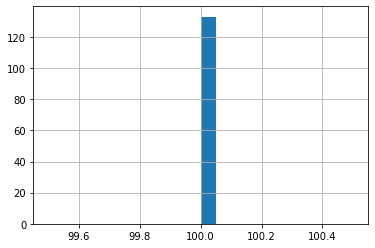

In [26]:
## histogrtaam of scores
school_dict_df['score'].hist(bins=20)